# Exploratory Data Analysis of the Admission Dataset

In this notebook, we will perform an exploratory data analysis (EDA) on the admission dataset. The goal is to understand the structure of the data, identify patterns, and gain insights that can guide further analysis or modeling.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ajuste de estilo dos gráficos
sns.set(style="whitegrid")


In [15]:
csv_file_path = "https://raw.githubusercontent.com/KatePril/admission-prediction/refs/heads/main/dataset/MBA.csv"
df = pd.read_csv(csv_file_path)
# Display the first few rows of the DataFrame
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [16]:
# 1. Informações gerais
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [17]:
# 2. Valores ausentes por coluna
missing_values = df.isnull().sum()

# 3. Distribuição da variável alvo
# Substituir valores ausentes na variável alvo por 'NotAdmit'
df['admission'] = df['admission'].fillna('NotAdmit')
admission_counts = df['admission'].value_counts(dropna=False)

# 4. Estatísticas descritivas das variáveis numéricas
desc_stats = df.describe()

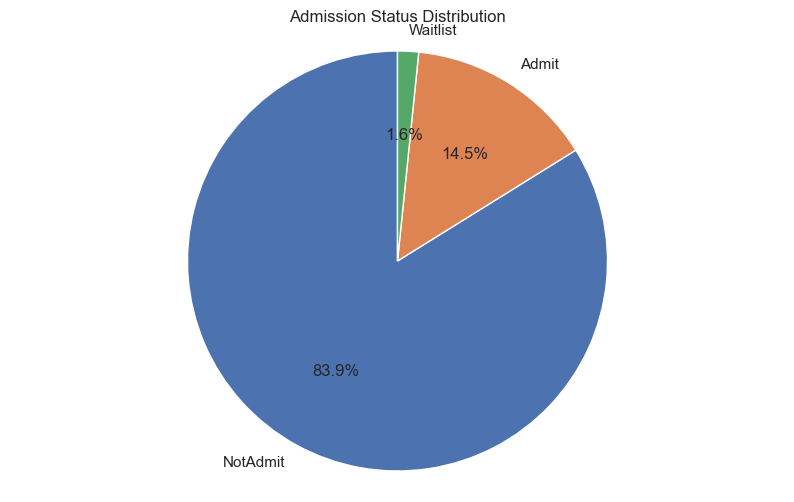

In [23]:
# Gráfico de pizza para distribuição das classes
plt.figure(figsize=(10, 6))
plt.pie(admission_counts, labels=admission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Admission Status Distribution')
plt.axis('equal')
plt.show()

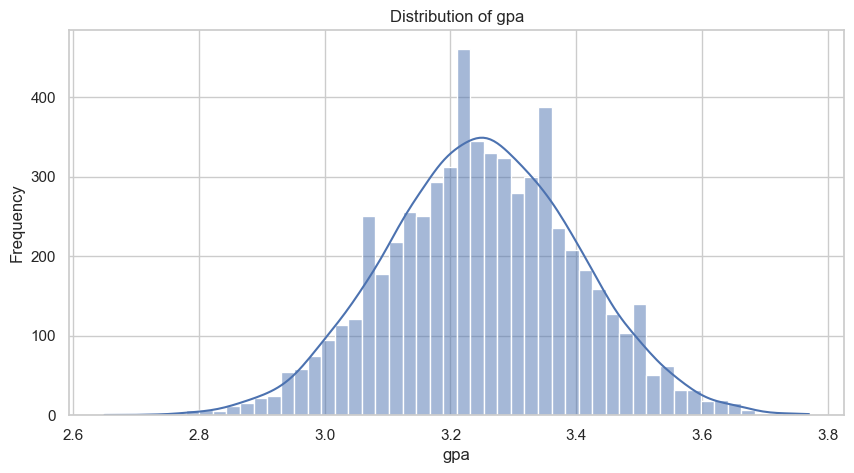

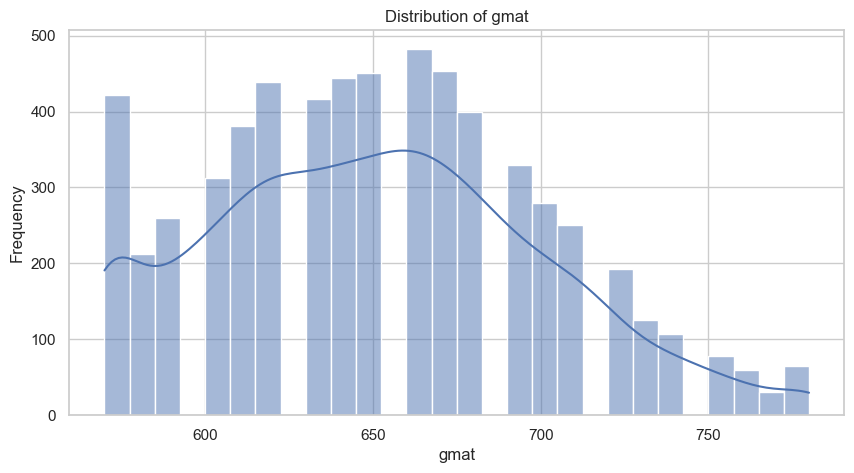

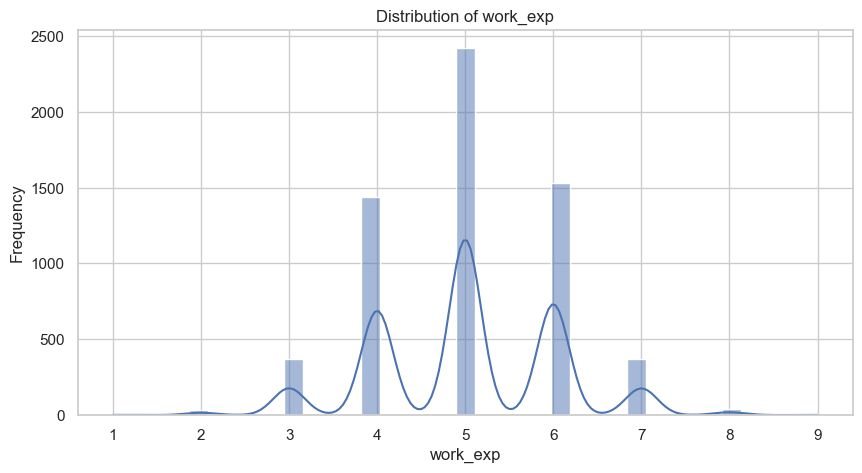

In [24]:
# 6. Histograma para variáveis numéricas
num_cols = ['gpa', 'gmat', 'work_exp']
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

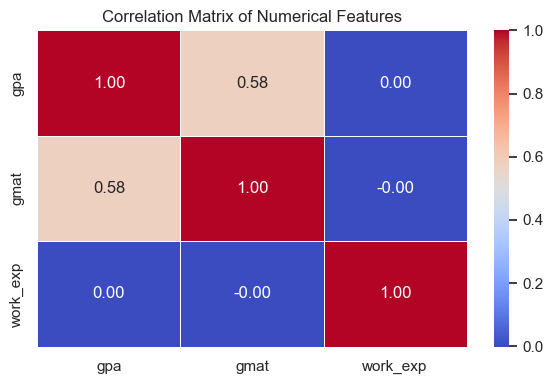

In [49]:
# Selecionar apenas as variáveis numéricas para a correlação
numerical_df = df[num_cols]

# Calcular matriz de correlação
corr_matrix = numerical_df.corr()

# Plotar a matriz de correlação como um heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


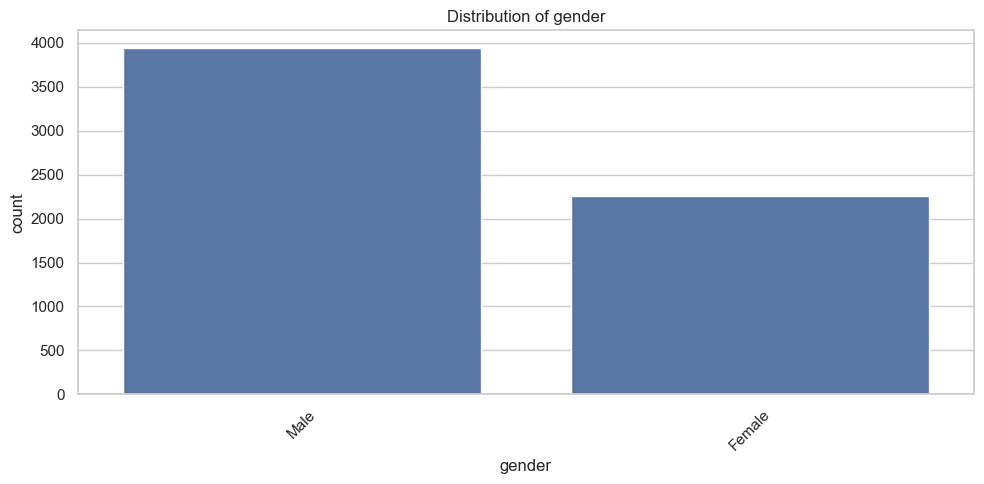

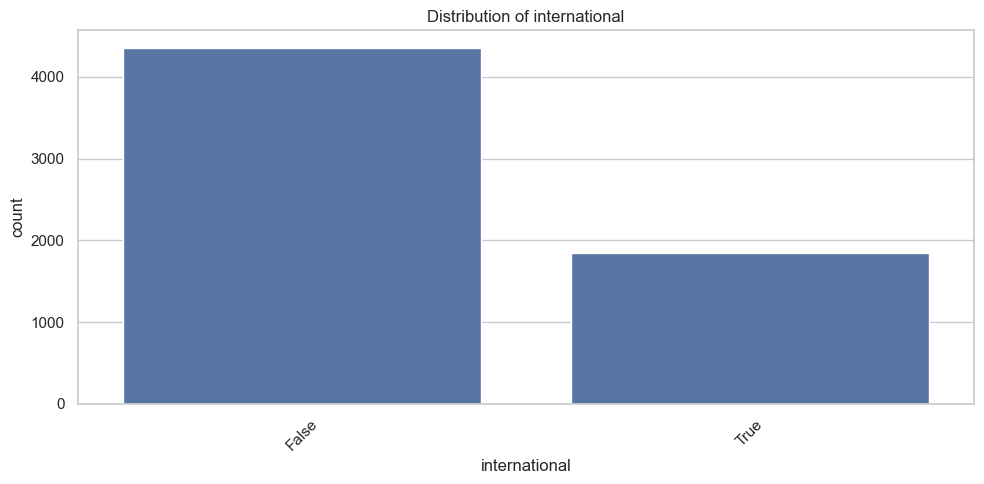

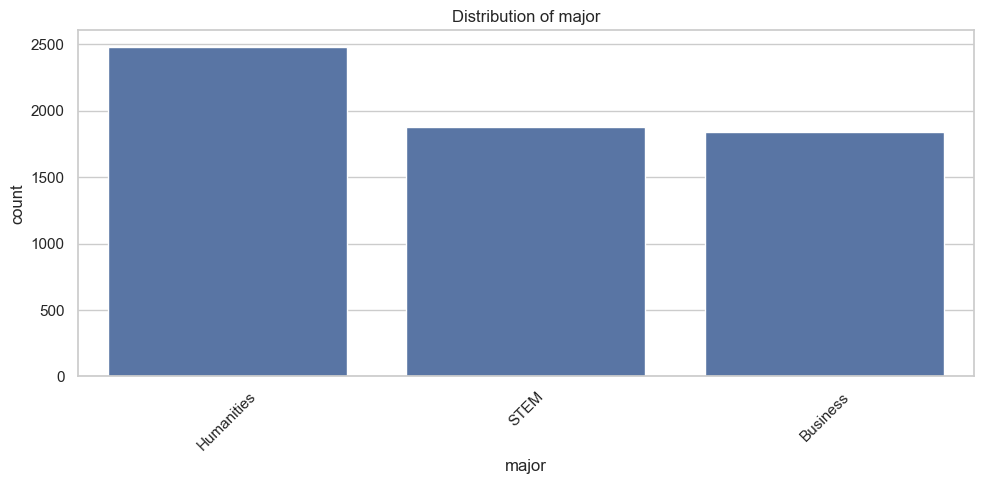

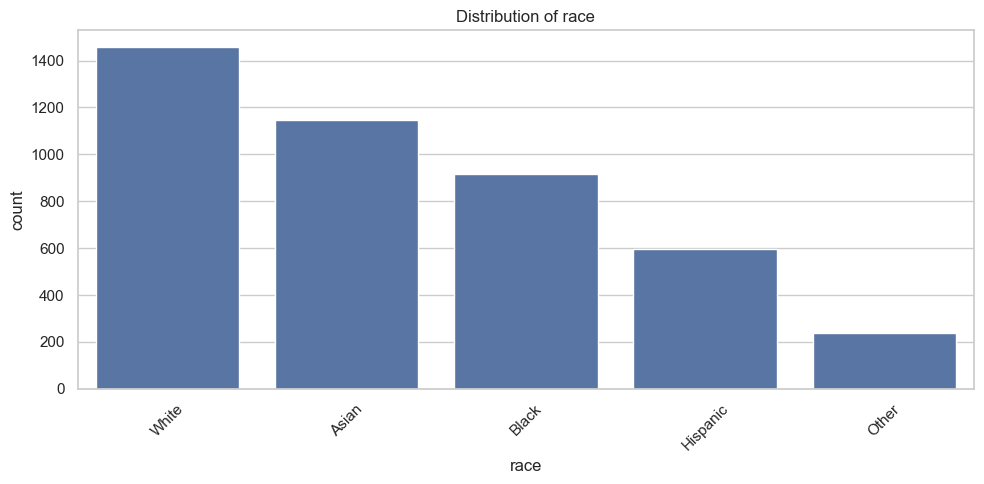

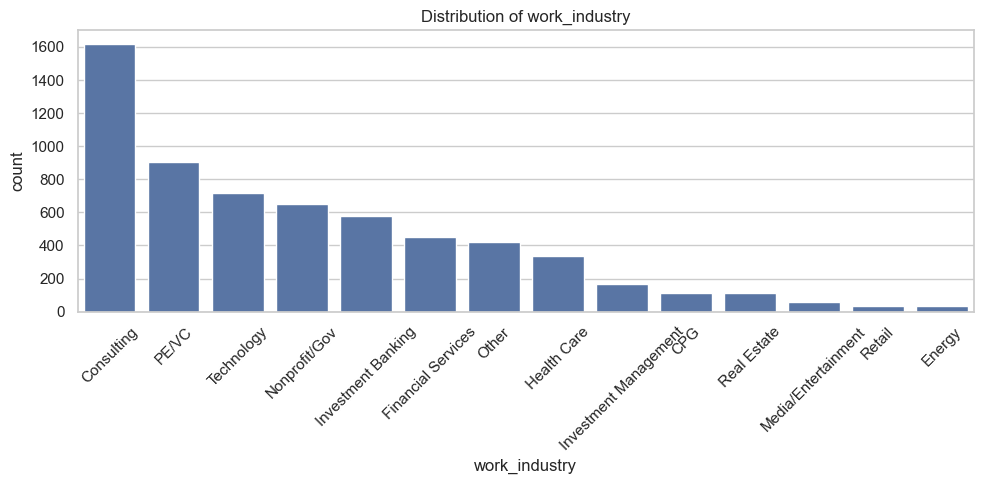

In [29]:
# 7. Gráfico de barras para variáveis categóricas
cat_cols = ['gender', 'international', 'major', 'race', 'work_industry']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [36]:
# Estatísticas descritivas por grupo de admissão
grouped_stats = df.groupby('admission')[num_cols].describe()

/var/folders/v_/z8qwlrbj7473y11zhtv8x26w0000gn/T/ipykernel_33467/1266971434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='admission', order=['Admit', 'Waitlist', 'NotAdmit'],


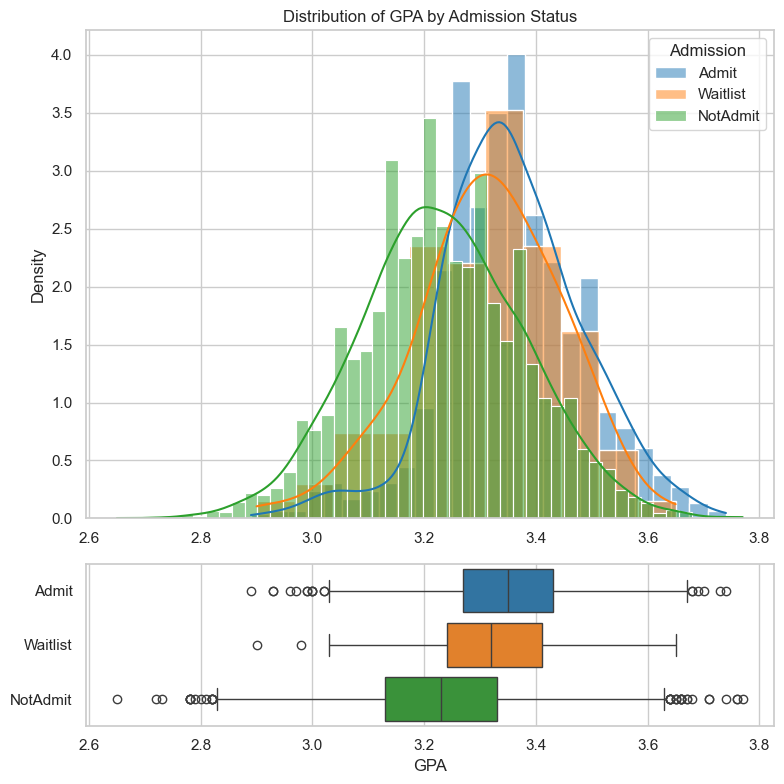

/var/folders/v_/z8qwlrbj7473y11zhtv8x26w0000gn/T/ipykernel_33467/1266971434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='admission', order=['Admit', 'Waitlist', 'NotAdmit'],


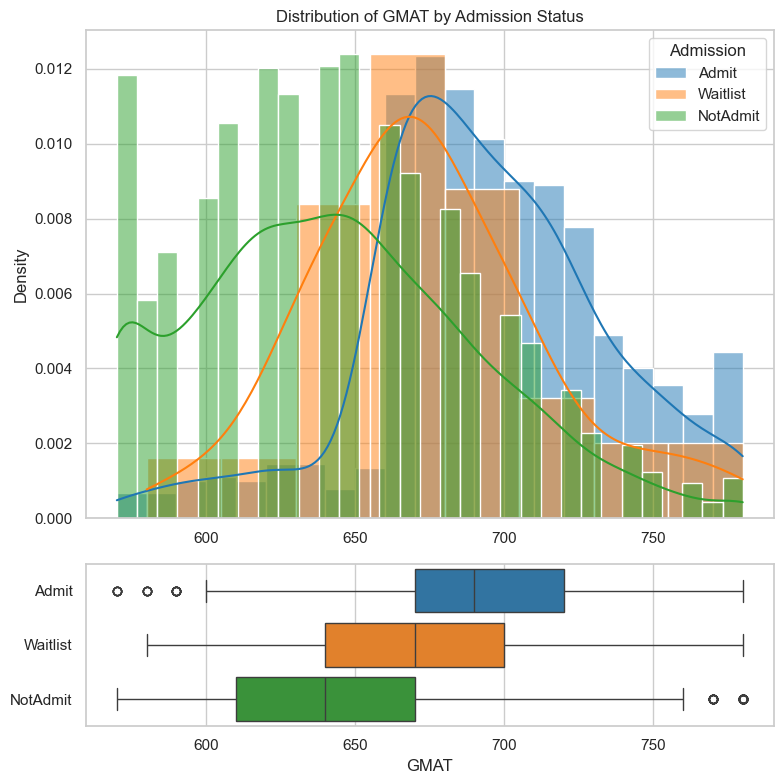

/var/folders/v_/z8qwlrbj7473y11zhtv8x26w0000gn/T/ipykernel_33467/1266971434.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='admission', order=['Admit', 'Waitlist', 'NotAdmit'],


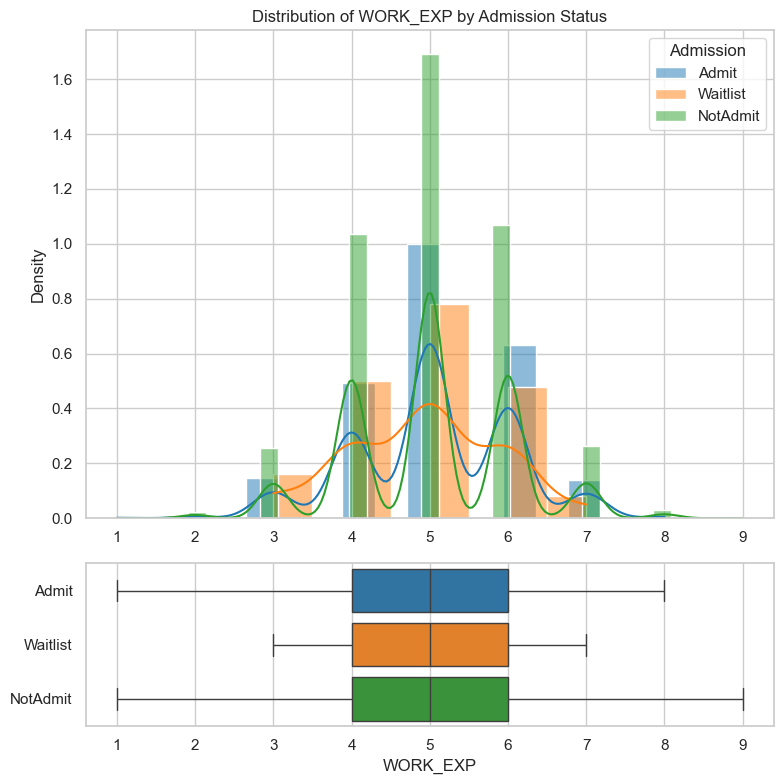

In [47]:
# Definir paleta de cores consistente para as classes
palette = {
    'Admit': '#1f77b4',      # azul
    'Waitlist': '#ff7f0e',   # laranja
    'NotAdmit': '#2ca02c'    # verde
}

# Histogramas com boxplots horizontais abaixo, usando a mesma paleta
for col in num_cols:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Histograma no topo
    for status in ['Admit', 'Waitlist', 'NotAdmit']:
        subset = df[df['admission'] == status]
        sns.histplot(subset[col], kde=True, label=status, stat="density", common_norm=False,
                     alpha=0.5, ax=axes[0], color=palette[status])
    axes[0].set_title(f'Distribution of {col.upper()} by Admission Status')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Density')
    axes[0].legend(title='Admission')

    # Boxplot na parte inferior
    sns.boxplot(data=df, x=col, y='admission', order=['Admit', 'Waitlist', 'NotAdmit'],
                palette=palette, ax=axes[1])
    axes[1].set_title('')
    axes[1].set_xlabel(col.upper())
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()


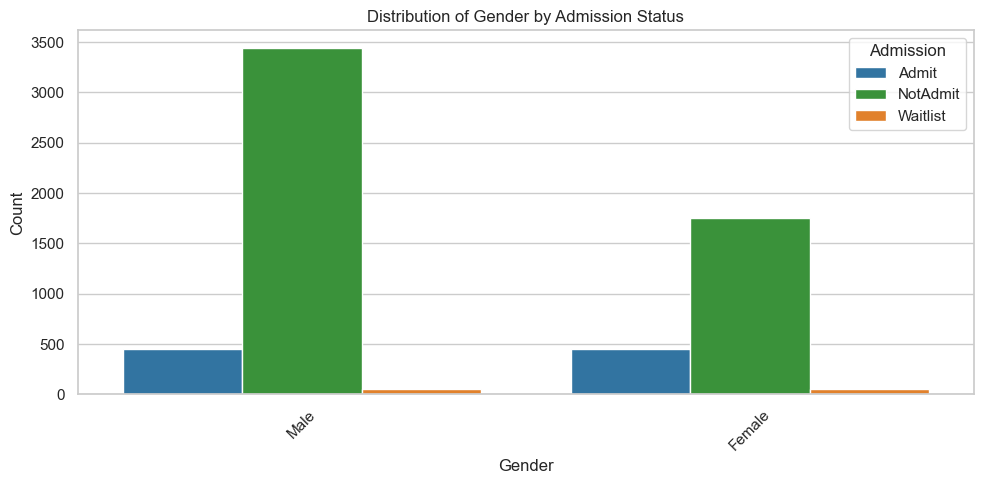

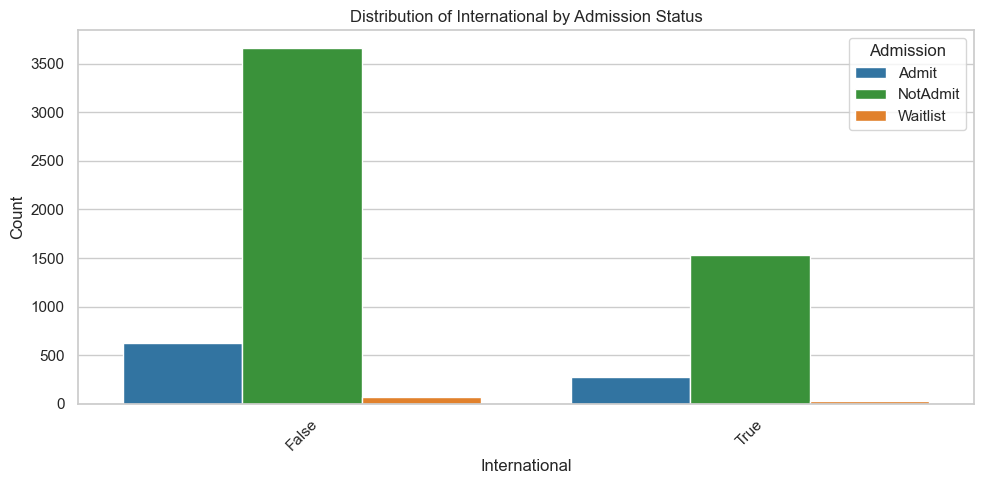

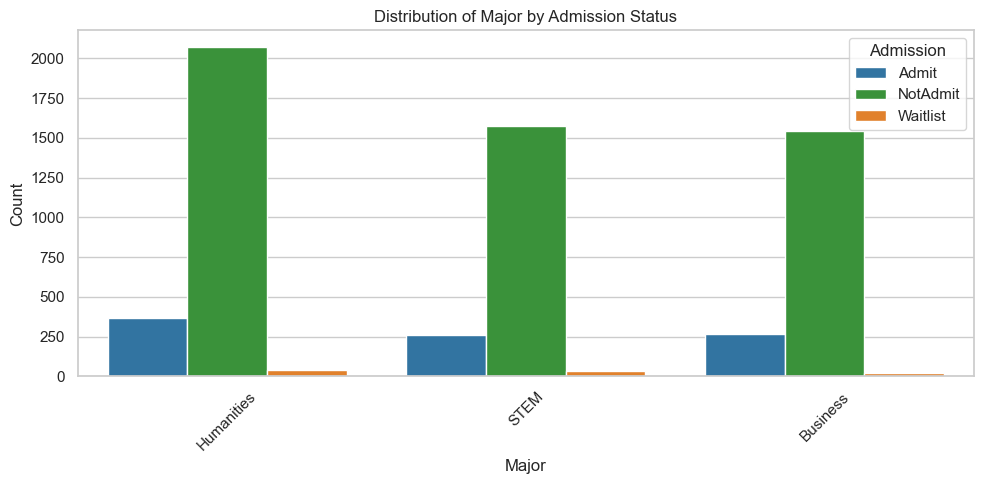

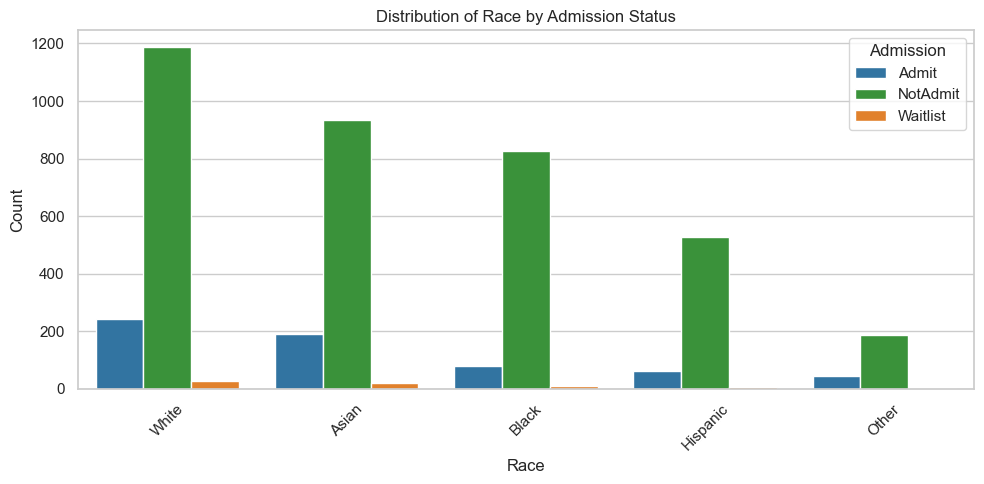

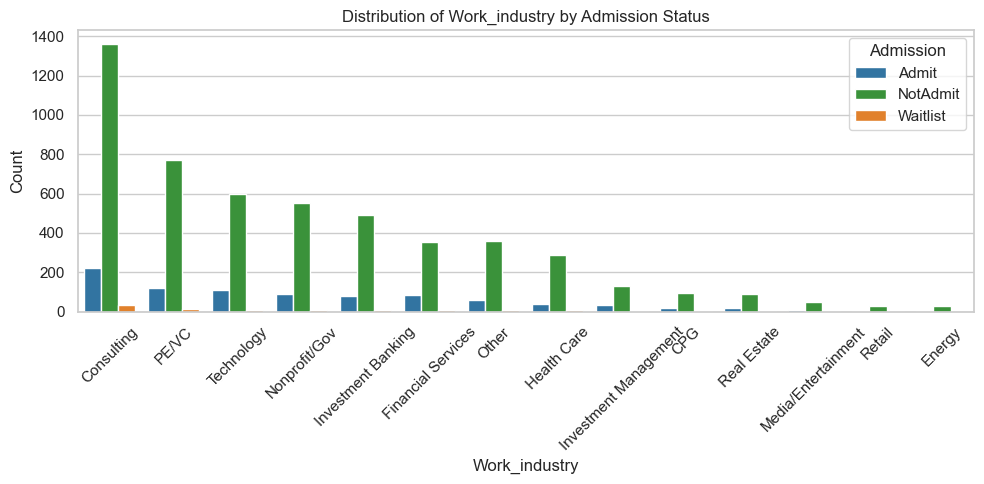

In [48]:
# Gerar gráficos de barras para variáveis categóricas por grupo de admissão
cat_cols = ['gender', 'international', 'major', 'race', 'work_industry']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='admission', palette=palette, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.capitalize()} by Admission Status')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Admission')
    plt.tight_layout()
    plt.show()
